# Assignment 3

This assignment has one main part:

**PCA** : In this part the goal is to implement the dimensionality reduction technique *Principal Component Analysis (PCA)* to a very high dimensional data and apply visualization. Note that you are not allowed to use the built-in PCA API provided by the sklearn library. Instead you will be implementing from the scratch. Use the data in data/train.csv for generating the PCA. See the detailed intructions below.
    

For this task we use the  MovieLens dataset. The data is in train.csv.
   

In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import sqrtm

# Part-1a: Convert data to user-movie rating matrix (10 points)
    - Read the train.csv file and movies.dat file and use user_id and movie_id to create user-movie rating matrix


In [2]:
# Read the user-movie rating in data/train.csv and convert it to a user-movie rating matrix (users in the rows and movies in the colums)
# Mind the header row in the train.csv
def readMovieRatingData():   
    df = pd.read_csv('data/train.csv')
    user_movie_matrix = df.pivot(index='user_id', columns='movie_id', values='rating')
    user_movie_matrix = user_movie_matrix.fillna(0)
    
    return user_movie_matrix


In [3]:
movie_ratings = readMovieRatingData()

movie_ratings.shape

(6040, 3666)

movie_ratings should have the shape 6040 (users) x 3952 (movies)

In [4]:
# Read the movie data from data/movies.dat
def readMovieData():
    movie_data = pd.read_csv('data/movies.dat', sep='::', engine='python', header=None, names=['movie_id', 'title', 'genres'], encoding='latin1')
    return movie_data


In [5]:
movie_data = readMovieData()

In [6]:
movie_data.shape

(3883, 3)

`movie_data` should have the shape 3883x3

## We are going to compute PCA for movies so transpose the matrix using X=readMovieRatingData().T


# Part-1b: Preprocessing  (10 points)
Before implementing PCA you are required to perform some preprocessing steps:
1. Mean normalization: Replace each feature/attribute, $x_{ji}$ with $x_j - \mu_j$, In other words, determine the mean of each feature set, and then for each feature subtract the mean from the value, so we re-scale the mean to be 0 
2. Feature scaling: If features have very different scales then scale make them comparable by altering the scale, so they all have a comparable range of values e.g. $x_{ji}$ is set to $(x_j - \mu_j) / s_j$  Where $s_j$ is some measure of the range, so could be  $\max(x_j) - \min(x_j)$ or Standard deviation $stddev(x_j)$.

In [7]:
def normScale(X):
    # Normalize the data to have zero mean and unit variance
    # Return the normalized data and the mean and standard deviation used for normalization
    # Hint: You can use the np.mean and np.std functions
    
    mean = np.mean(X, axis=0)  # Mean of each feature (movie)
    std = np.std(X, axis=0)    # Standard deviation of each feature

    X_norm = (X - mean) / std  # Normalize to zero mean and unit variance
    return X_norm
X = movie_ratings
X = normScale(X)

# Part-2: Covariance matrix  (15 points)
Now the preprocessing is finished. Next, as explained in the lecture, you need to compute the covariance matrix https://en.wikipedia.org/wiki/Covariance_matrix. Given $n \times m$ $n$ rows and $m$ columns matrix, a covariance matrix is an $m \times m$ matrix given as below (sigma)
$\Sigma = \frac{1}{m}\sum{\left(x^{i}\right)\times \left(x^{i}\right)^{T}}$
You may use the "numpy.cov" function in numpy library 

In [8]:
# Compute X to covariance matrix cov_matrix.
cov_matrix = np.cov(X)

# The cov_matrix should have shape 6040x6040

In [9]:
cov_matrix.shape

(6040, 6040)

# Instructions for part 3, 4, and 5
- getSVD() function is expected to return 3 values. For example: ```U, S, V = getSVD(cov_matrix)```
- You can follow the skeleton below to have an idea on how the autograder's test calls your functions:
```
U, S, V = getSVD(cov_matrix)
z = getKComponents(U, X, k)
ratio = getVarianceRatio(z, U, X, k)
```
- Using the built-in PCA implementation in sklearn, the approximate X matrix can be obtained by function ```inverse_transform```

# Part-3: SVD computation  (10 points)
Now compute the SVD on the covariance matrix $SVD(\Sigma)$. You may use the svd implementation in numpy.linalg.svd

In [10]:
# user np.linalg.svd here
def getSVD(cov_matrix):
    U, S, V = np.linalg.svd(cov_matrix)
    return U, S, V


In [11]:
U, S, V = getSVD(cov_matrix)

In [12]:
U.shape, S.shape, V.shape

((6040, 6040), (6040,), (6040, 6040))

# Part-4: Compute PCA matrix (K dimensional)  (10 points)
Now select the first $k$ columns from the matrix $U$ and multiply with $X$ to get $k$ dimensional representation.

In [13]:
# implement matrix multiplication of first k columns of U * X
def getKComponents(U, X, K):
    U_k = U[:, :K]
    Z = np.dot(U_k.T, X)
    return Z


In [14]:
z = getKComponents(U, X, 2)

# Part-5: Compute Reconstruction Error  (10 points)
Implement a function to compute the variance ratio (from reconstruction error)

In [15]:
# Implement computation of reconstruction error
def getVarianceRatio(Z, U, X, K):
    U_k = U[:, :K]
    X_approx = np.dot(U_k, Z)
    data = np.linalg.norm(X - X_approx, 'fro')**2
    projected = np.linalg.norm(X, 'fro')**2
    ratio = data / projected
    return ratio


In [16]:
ratio = getVarianceRatio(z, U, X, 2)

In [17]:
ratio

np.float64(0.9396871166079663)

# Compare the variance ration to the built-in PCA implementation in sklearn https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html (5 points)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
z_pca = pca.fit_transform(X)


In [19]:
X_approx_pca = pca.inverse_transform(z_pca)

reconstruction_error = np.linalg.norm(X - X_approx_pca, 'fro')**2 / np.linalg.norm(X, 'fro')**2
print(reconstruction_error)

0.9236764490477088


# Part-6: Scatter plot 2-dimensional PCA  (10 points)
Using matplotlib plot the 2-dimensional scatter plot of the first 2 compoenents with y (movie genre from movies.dat file) as labels. Remember you are plotting movies in dimensions so you can label them with movie generes.

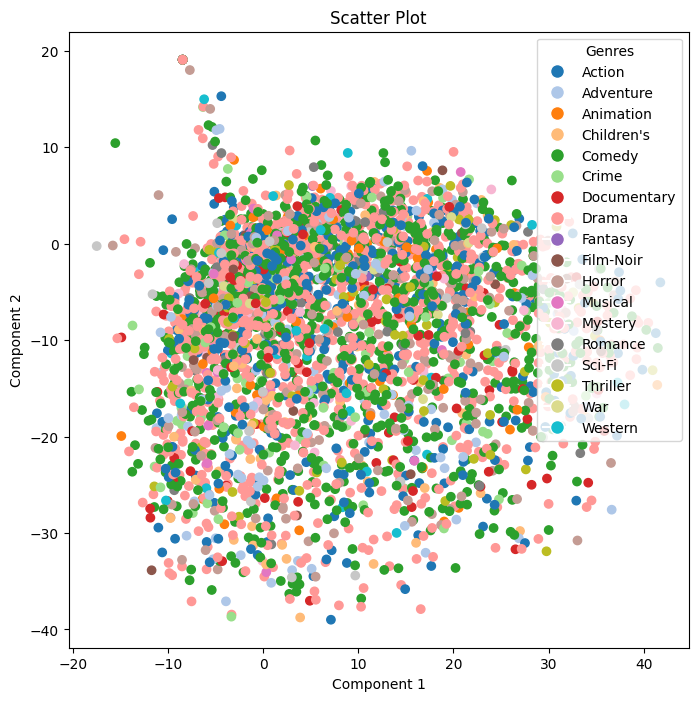

In [20]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plotFunction(PC, movie_data):
    if PC.shape[1] > 2:
        PC = PC[:, :movie_data.shape[0]].T
    x = PC[:, 0]
    y = PC[:, 1]
    
    # Ensure the number of movies matches the number of rows in PC
    movie_data = movie_data.iloc[:len(x)].copy()

    # Check if genres are already in list form, if not, split them
    if not isinstance(movie_data['genres'].iloc[0], list):
        movie_data.loc[:, 'genres'] = movie_data['genres'].apply(lambda x: x.split('|'))
    
    # Flatten the list of genres and get unique ones
    unique_genres = sorted(set(genre for sublist in movie_data['genres'] for genre in sublist))
    genre_colors = {genre: plt.cm.tab20(i / len(unique_genres)) for i, genre in enumerate(unique_genres)}
    colors = [genre_colors[genres[0]] for genres in movie_data['genres']]  # Use the first genre for each movie to determine its color. Leads to bias due to the order of the genres (alphabetic)
    
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=genre_colors[genre], markersize=10, label=genre) for genre in unique_genres]
    
    plt.figure(figsize=(8,8))
    plt.scatter(x, y, c=colors)
    plt.legend(handles=legend_elements, title="Genres")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Scatter Plot')
    plt.show()

plotFunction(z, movie_data)


# Part-7 Find best $K$  (10 points)
Find the minimum value of $K$ with which the ratio between averaged squared projection error with total variation in data is less than 1% in other words we retain 90% of the variance. You can achieve this by repeating getKComponents with $K=1$ until the variance ratio is <= 1%.

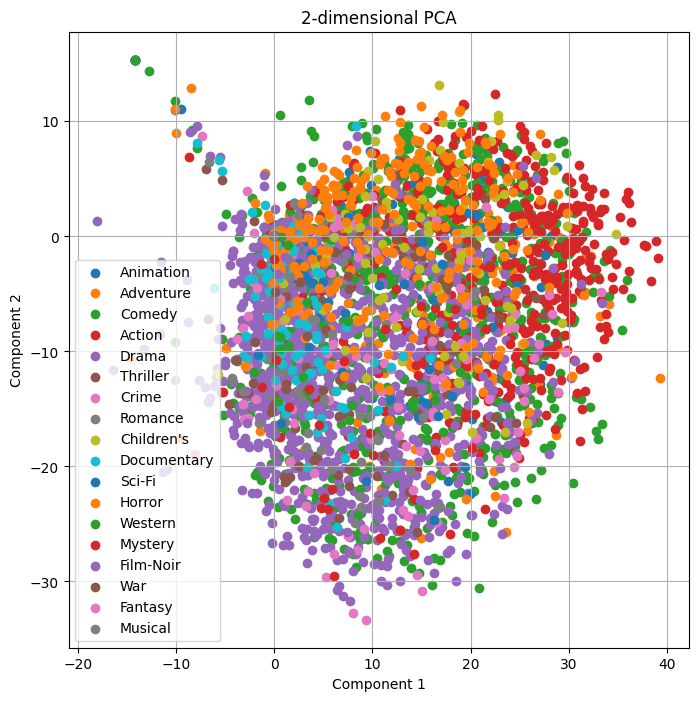

In [ ]:
#Expected plot
plotFunction(z, movie_data)

In [22]:
# Implement the loop to find the best K until the ratio is less than 0.1
def findBestK(initial, step, U, X):
    K_min = initial
    ratio = 1.0
    # Ensure K_min does not exceed the maximum number of eigenvectors.
    max_K = U.shape[1]
    
    while K_min <= max_K:
        Z_temp = getKComponents(U, X, K_min)
        ratio = getVarianceRatio(Z_temp, U, X, K_min)
        print(f"K = {K_min}, reconstruction error ratio = {ratio:.4f}")
        if ratio < 0.01:
            break
        K_min += step
    return K_min

In [23]:
k_best = findBestK(1, 10, U, X)

K = 1, reconstruction error ratio = 0.9686
K = 11, reconstruction error ratio = 0.8541
K = 21, reconstruction error ratio = 0.8131
K = 31, reconstruction error ratio = 0.7842
K = 41, reconstruction error ratio = 0.7617
K = 51, reconstruction error ratio = 0.7424
K = 61, reconstruction error ratio = 0.7253
K = 71, reconstruction error ratio = 0.7095
K = 81, reconstruction error ratio = 0.6946
K = 91, reconstruction error ratio = 0.6806
K = 101, reconstruction error ratio = 0.6675
K = 111, reconstruction error ratio = 0.6551
K = 121, reconstruction error ratio = 0.6432
K = 131, reconstruction error ratio = 0.6318
K = 141, reconstruction error ratio = 0.6208
K = 151, reconstruction error ratio = 0.6104
K = 161, reconstruction error ratio = 0.6002
K = 171, reconstruction error ratio = 0.5904
K = 181, reconstruction error ratio = 0.5810
K = 191, reconstruction error ratio = 0.5718
K = 201, reconstruction error ratio = 0.5629
K = 211, reconstruction error ratio = 0.5542
K = 221, reconstructi

# Part-8: TSNE visualization (10 points)
Finally, having found an optimal $K$ use these components as an input data to another dimensionality reduction method called tSNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) and reduce it to 2 dimensions.

In [24]:
from sklearn.manifold import TSNE
Z_best = getKComponents(U, X, k_best)  # shape: (k_best, number_of_movies)

# TSNE expects input shape (n_samples, n_features). Z_best is (k_best, n_movies)
Z_best_T = Z_best.T  # shape becomes (number_of_movies, k_best)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(Z_best_T)
# tsne_results now has shape (number_of_movies, 2)

Finally, scatter plot the components given by the tSNE using matplotlib compare it to the earlier scatter plot.

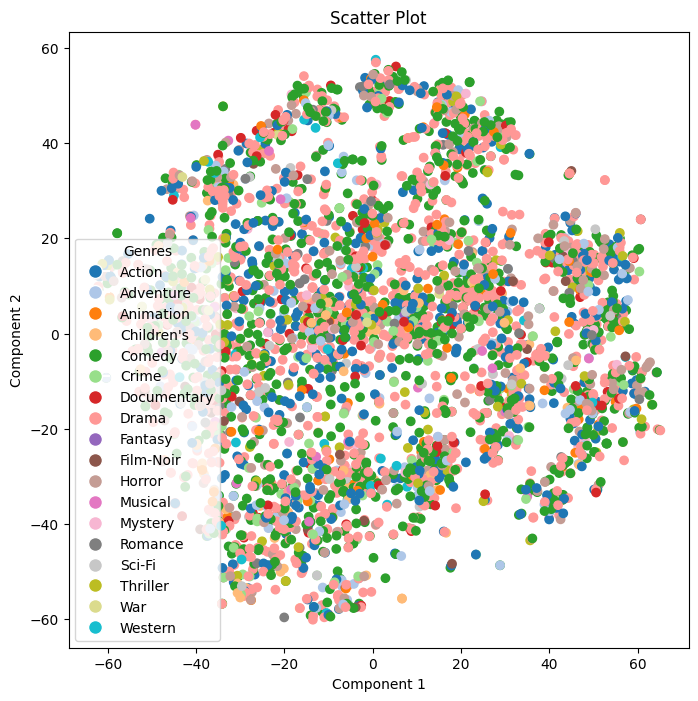

In [25]:
# Scatter plot the 2-dimensional tsne compoents with target as labels
plotFunction(tsne_results, movie_data)